# Parametric Hawkes Process

The example below is parametic experiment, it uses exponenial decay kernels to model relationships of processes

https://x-datainitiative.github.io/tick/modules/hawkes.html

### Notes
0. This is simulate-and-fit experiment

1. n_realizations - The higher the number of realizations we generate for our experiment, the better fit the model is, obviously.

2. The examples below simulates a Hawkes process with D=2 counting process. It defines their baseline intensities, decay params, and their adjacency values. 

4. decays - as it is sum of exponential kernel - each node has sum of three exponential decay kernels 

4. baseline_intensities - one for each process (2 in total)

5. adjacency (2 x 2 x 3) => 2 process, self and mutual effect (2), 1 for each exponential kerenls (3 in total)
    
    Negative adjacency values are not allowed by default. Needs some configuration
    

In [103]:
import matplotlib.pyplot as plt

from tick.plot import plot_hawkes_kernels
from tick.hawkes import SimuHawkesSumExpKernels, SimuHawkesMulti, \
    HawkesSumExpKern

end_time = 1000
n_realizations = 10

decays = [.5, 2., 6.]
baseline = [0.12, 0.07]

## Some random adjacency
adjacency = [[[0, .1, .4], [.2, 0., .2]],
             [[0, 0, 0], [.6, .3, 0]]]


## Process are not related 
## Here zeroes represent the effect of Process 0 on itself and on Process 1
## Process (0) has no effect on itself and Process (1) 
adjacency = [[[0, 0, 0], [.2, 0., .2]],
             [[0, 0, 0], [.6, .3, 0]]]



## Create our kernels - Sum of Exponential kernels 
hawkes_exp_kernels = SimuHawkesSumExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=False, seed=1039)

## Simulation 
Split our period [0-end_time] by the n_realizations.

And for each period get samples out of of kernels

In [105]:

multi = SimuHawkesMulti(hawkes_exp_kernels, n_simulations=n_realizations)

multi.end_time = [(i + 1) / n_realizations * end_time for i in range(n_realizations)]
multi.simulate()


## Learning

Here you can configure

1. Penalty to use - l1, l2, ...
2. Solver type - gd(gradient descent), agd, ...
3. Maximum iterations - max number of iteration of the solver 

/home/yido/Downloads/y/lib/python3.8/site-packages/tick/plot/plot_hawkes.py:163: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax_list_list = plt.subplots(n_nodes, n_nodes, sharex=True,


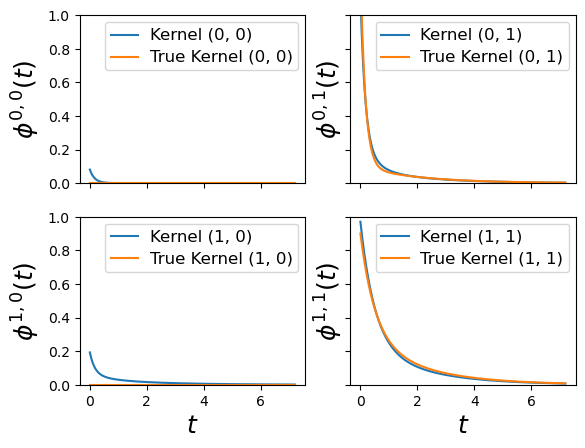

In [119]:

learner = HawkesSumExpKern(decays, penalty='elasticnet',
                           elastic_net_ratio=0.8)
learner.fit(multi.timestamps)

fig = plot_hawkes_kernels(learner, hawkes=hawkes_exp_kernels, show=False)

for ax in fig.axes:
    ax.set_ylim([0., 1.])
    
    
fig